# 🌾 Crop Classification with ResNet-50 — Improved Version

In [1]:

# Step 1: Import Libraries
import os
import torch
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from collections import Counter
from torchvision import datasets, transforms, models
from torch import nn, optim
from torch.utils.data import DataLoader
from torchvision.models import resnet50, ResNet50_Weights

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)


Device: cpu


In [2]:

#  Step 2: Load and Transform Dataset
data_dir = r"C:\Users\abyla\Desktop\Research\Agricultural-crops"

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

dataset = datasets.ImageFolder(root=data_dir, transform=transform)
dataloader = DataLoader(dataset, batch_size=4, shuffle=True)
class_names = dataset.classes
print("Classes:", class_names)

#  Step 3: Check Class Distribution
labels = [label for _, label in dataset]
label_counts = Counter(labels)
print("Class counts:", {class_names[k]: v for k, v in label_counts.items()})


Classes: ['Cherry', 'Coffee-plant', 'Cucumber', 'Fox_nut(Makhana)', 'Lemon', 'Olive-tree', 'Pearl_millet(bajra)', 'Tobacco-plant', 'almond', 'banana', 'cardamom', 'chilli', 'clove', 'coconut', 'cotton', 'gram', 'jowar', 'jute', 'maize', 'mustard-oil', 'papaya', 'pineapple', 'rice', 'soyabean', 'sugarcane', 'sunflower', 'tea', 'tomato', 'vigna-radiati(Mung)', 'wheat']
Class counts: {'Cherry': 32, 'Coffee-plant': 29, 'Cucumber': 31, 'Fox_nut(Makhana)': 23, 'Lemon': 28, 'Olive-tree': 30, 'Pearl_millet(bajra)': 39, 'Tobacco-plant': 33, 'almond': 21, 'banana': 31, 'cardamom': 22, 'chilli': 23, 'clove': 30, 'coconut': 25, 'cotton': 32, 'gram': 25, 'jowar': 30, 'jute': 23, 'maize': 31, 'mustard-oil': 28, 'papaya': 23, 'pineapple': 25, 'rice': 29, 'soyabean': 30, 'sugarcane': 25, 'sunflower': 24, 'tea': 23, 'tomato': 26, 'vigna-radiati(Mung)': 27, 'wheat': 31}


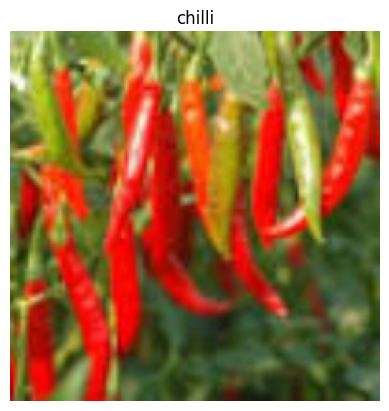

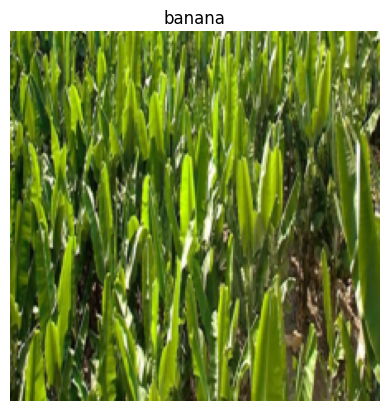

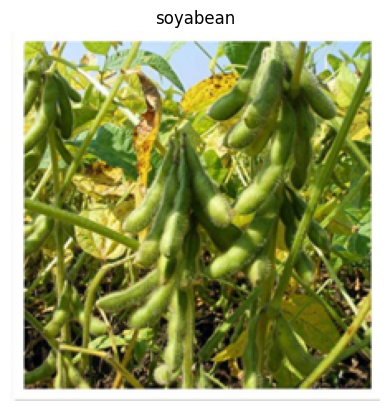

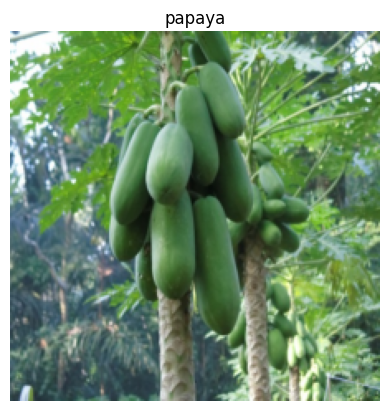

In [3]:

# Step 4: Visualize Some Sample Images
def imshow(img, title):
    img = img.numpy().transpose((1, 2, 0))
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')
    plt.show()

images, labels = next(iter(dataloader))
for i in range(4):
    imshow(images[i], class_names[labels[i]])


In [4]:

#  Step 5: Load and Customize ResNet-50
weights = ResNet50_Weights.DEFAULT
model = resnet50(weights=weights)

for param in model.parameters():
    param.requires_grad = False

# Unfreeze layer4 and layer3 for better learning
for param in model.layer4.parameters():
    param.requires_grad = True
for param in model.layer3.parameters():
    param.requires_grad = True

num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, len(class_names))
model = model.to(device)


In [5]:

#  Step 6: Loss, Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.001)


In [6]:

#  Step 7: Training Loop with Loss Tracking
epochs = 15
train_losses = []

for epoch in range(epochs):
    model.train()
    running_loss = 0.0

    for images, labels in dataloader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    epoch_loss = running_loss / len(dataloader)
    train_losses.append(epoch_loss)
    print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss:.4f}")


Epoch 1/15, Loss: 3.0072
Epoch 2/15, Loss: 2.0803
Epoch 3/15, Loss: 1.2417
Epoch 4/15, Loss: 0.7784
Epoch 5/15, Loss: 0.5155
Epoch 6/15, Loss: 0.3618
Epoch 7/15, Loss: 0.2104
Epoch 8/15, Loss: 0.1392
Epoch 9/15, Loss: 0.1171
Epoch 10/15, Loss: 0.0981
Epoch 11/15, Loss: 0.1111
Epoch 12/15, Loss: 0.1214
Epoch 13/15, Loss: 0.0784
Epoch 14/15, Loss: 0.1045
Epoch 15/15, Loss: 0.0721


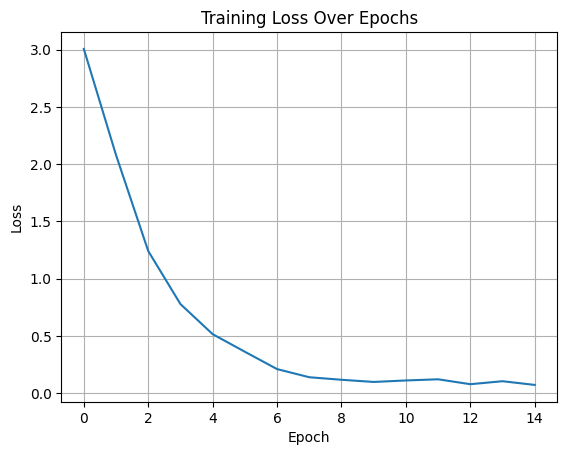

In [7]:

#  Step 8: Plot Training Loss
plt.plot(train_losses)
plt.title("Training Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()


In [8]:

# Step 9: Save Model
torch.save(model.state_dict(), 'crop_classifier_final.pth')
print("Model saved.")


Model saved.


In [9]:

# Step 10: Predict Image Function
def predict_image(img_path):
    img = Image.open(img_path)
    transform_eval = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor()
    ])
    img_tensor = transform_eval(img).unsqueeze(0).to(device)

    model.eval()
    with torch.no_grad():
        output = model(img_tensor)
        _, predicted = torch.max(output, 1)
    return class_names[predicted.item()]


In [16]:

# Step 11: Test on Specific Images
test_images = [
    r"C:\Users\abyla\Desktop\Research\Agricultural-crops\banana\image (21).jpg",
    r"C:\Users\abyla\Desktop\Research\Agricultural-crops\cotton\image (9).jpg",
    r"C:\Users\abyla\Desktop\Research\Agricultural-crops\clove\image12.jpeg",
    r"C:\Users\abyla\Desktop\Research\Agricultural-crops\cardamom\image (5).jpeg",
    r"C:\Users\abyla\Desktop\Research\Agricultural-crops\sunflower\image (1).jpeg"
]

for path in test_images:
    if os.path.exists(path):
        print(f"{path} → Predicted: {predict_image(path)}")
    else:
        print(f"{path} does not exist.")


C:\Users\abyla\Desktop\Research\Agricultural-crops\banana\image (21).jpg → Predicted: banana
C:\Users\abyla\Desktop\Research\Agricultural-crops\cotton\image (9).jpg → Predicted: cotton
C:\Users\abyla\Desktop\Research\Agricultural-crops\clove\image12.jpeg → Predicted: clove
C:\Users\abyla\Desktop\Research\Agricultural-crops\cardamom\image (5).jpeg → Predicted: cardamom
C:\Users\abyla\Desktop\Research\Agricultural-crops\sunflower\image (1).jpeg → Predicted: sunflower


In [17]:
# Split dataset into train and validation
from torch.utils.data import random_split

val_ratio = 0.2
val_size = int(len(dataset) * val_ratio)
train_size = len(dataset) - val_size

train_set, val_set = random_split(dataset, [train_size, val_size])
train_loader = DataLoader(train_set, batch_size=4, shuffle=True)
val_loader = DataLoader(val_set, batch_size=4, shuffle=False)
print(f"Train size: {len(train_set)}, Val size: {len(val_set)}")


Train size: 664, Val size: 165


In [18]:
# Retrain using train_loader
train_losses = []
epochs = 10

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    epoch_loss = running_loss / len(train_loader)
    train_losses.append(epoch_loss)
    print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss:.4f}")


Epoch 1/10, Loss: 0.1079
Epoch 2/10, Loss: 0.0404
Epoch 3/10, Loss: 0.0439
Epoch 4/10, Loss: 0.0458
Epoch 5/10, Loss: 0.0819
Epoch 6/10, Loss: 0.0935
Epoch 7/10, Loss: 0.0444
Epoch 8/10, Loss: 0.0512
Epoch 9/10, Loss: 0.0883
Epoch 10/10, Loss: 0.0337


In [26]:
!pip install scikit-learn


[notice] A new release of pip is available: 24.3.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


In [25]:
# Step 13: Evaluate Accuracy on Validation Set
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in val_loader:
        images = images.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.numpy())

acc = accuracy_score(all_labels, all_preds)
print(f" Validation Accuracy: {acc * 100:.2f}%")

 Validation Accuracy: 86.06%


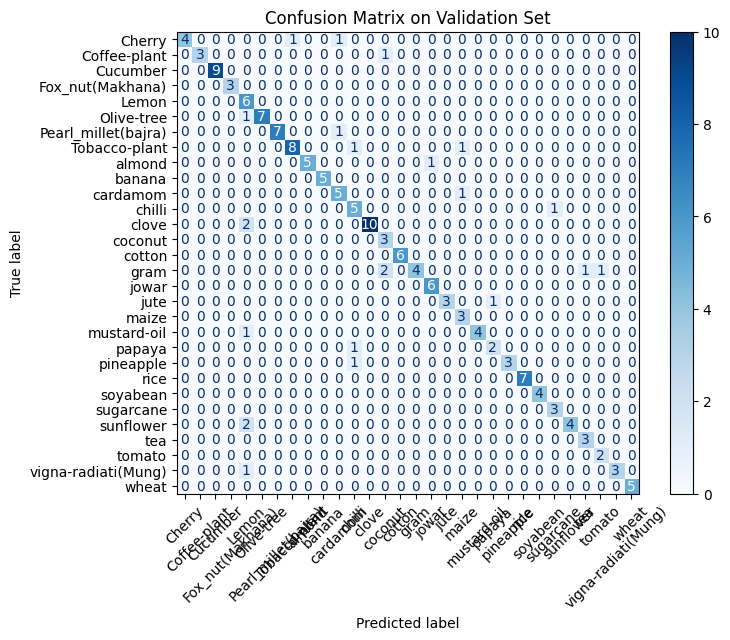

In [28]:
#  Step 14: Show Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax, cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix on Validation Set")
plt.grid(False)
plt.show()

In [29]:
# Step 15: Export Predictions to CSV
import pandas as pd
import uuid

# List of file paths, predicted and true labels
results = []
for i, (images, labels) in enumerate(val_loader):
    images = images.to(device)
    with torch.no_grad():
        outputs = model(images)
        _, preds = torch.max(outputs, 1)

    for j in range(len(images)):
        image_index = i * val_loader.batch_size + j
        true_label = class_names[labels[j].item()]
        pred_label = class_names[preds[j].item()]
        results.append({
            "sample_id": str(uuid.uuid4()),
            "true_label": true_label,
            "predicted_label": pred_label
        })

# Convert to DataFrame and export
df = pd.DataFrame(results)
csv_path = "crop_predictions.csv"
df.to_csv(csv_path, index=False)
print(f" Predictions exported to {csv_path}")
df.head()


 Predictions exported to crop_predictions.csv


,sample_id,true_label,predicted_label
0,ca61832c-6450-4672-970d-b2a9961978bd,coconut,coconut
1,eeb8c7c9-f47e-40e5-a14d-0d1f2241e8ca,tea,tea
2,e279c2bd-f819-48a6-a88e-e0e682107440,tomato,tomato
3,ffab9950-edea-4d6e-a2a1-411946c16a1b,almond,almond
4,961c950b-69a9-4875-a610-661d182aab72,Tobacco-plant,Tobacco-plant


In [33]:
!pip install opencv-python


[notice] A new release of pip is available: 24.3.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [40]:
import cv2
import torchvision.transforms.functional as F
import matplotlib.cm as cm

def generate_gradcam(model, image_tensor, target_layer):
    model.eval()
    gradients = []
    activations = []

    def backward_hook(module, grad_input, grad_output):
        gradients.append(grad_output[0])

    def forward_hook(module, input, output):
        activations.append(output)

    handle_fw = target_layer.register_forward_hook(forward_hook)
    handle_bw = target_layer.register_backward_hook(backward_hook)

    output = model(image_tensor)
    class_idx = output.argmax(dim=1).item()
    score = output[0, class_idx]

    model.zero_grad()
    score.backward()

    grads_val = gradients[0][0].cpu().numpy()
    activations_val = activations[0][0].detach().cpu().numpy()


    weights = grads_val.mean(axis=(1, 2))
    cam = np.zeros(activations_val.shape[1:], dtype=np.float32)
    for i, w in enumerate(weights):
        cam += w * activations_val[i, :, :]

    cam = np.maximum(cam, 0)
    cam = cv2.resize(cam, (224, 224))
    cam -= cam.min()
    cam /= cam.max()

    handle_fw.remove()
    handle_bw.remove()

    return cam, class_idx


In [41]:
def show_gradcam(img_path):
    img = Image.open(img_path).convert("RGB")
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor()
    ])
    input_tensor = transform(img).unsqueeze(0).to(device)

    cam, pred_class_idx = generate_gradcam(model, input_tensor, model.layer4)
    heatmap = cv2.applyColorMap(np.uint8(255 * cam), cv2.COLORMAP_JET)
    input_image_np = input_tensor.squeeze(0).cpu().numpy().transpose(1, 2, 0)
    input_image_np = (input_image_np - input_image_np.min()) / (input_image_np.max() - input_image_np.min())
    input_image_uint8 = np.uint8(255 * input_image_np)

    heatmap_resized = cv2.resize(heatmap, (224, 224))
    superimposed_img = cv2.addWeighted(input_image_uint8, 0.6, heatmap_resized, 0.4, 0)

    plt.figure(figsize=(10, 4))
    plt.subplot(1, 3, 1)
    plt.imshow(img)
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(heatmap_resized)
    plt.title("Grad-CAM Heatmap")
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(superimposed_img)
    plt.title(f"Superimposed - Pred: {class_names[pred_class_idx]}")
    plt.axis('off')

    plt.tight_layout()
    plt.show()


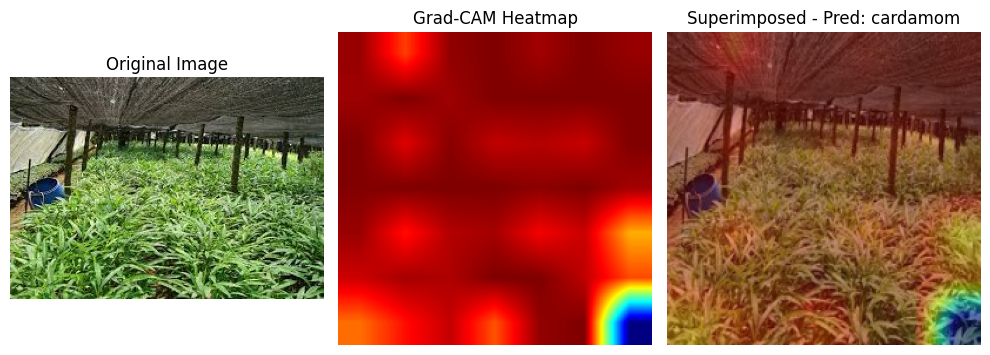

In [42]:
show_gradcam(r"C:\Users\abyla\Desktop\Research\Agricultural-crops\cardamom\image (5).jpeg")

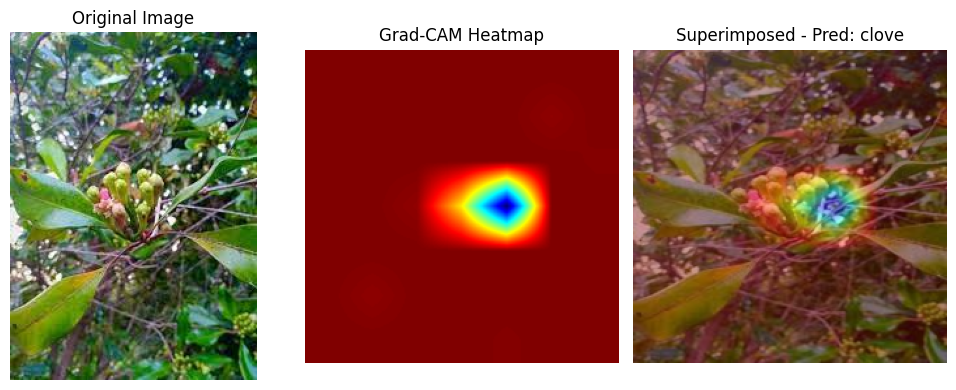

In [44]:
show_gradcam(r"C:\Users\abyla\Desktop\Research\Agricultural-crops\clove\image21.jpeg")

In [50]:
!pip install gradio


[notice] A new release of pip is available: 24.3.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip
C:\Users\abyla\AppData\Local\Programs\Python\Python313\Lib\site-packages\torch\nn\modules\module.py:1842: FutureWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  self._maybe_warn_non_full_backward_hook(args, result, grad_fn)
C:\Users\abyla\AppData\Local\Programs\Python\Python313\Lib\site-packages\torch\nn\modules\module.py:1842: FutureWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  self._maybe_warn_non_full_backward_hook(args, result, grad_fn)
C:\Us

In [49]:
import gradio as gr

def classify_and_explain(image):
    img = Image.fromarray(image).convert("RGB")
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor()
    ])
    input_tensor = transform(img).unsqueeze(0).to(device)

    # Get prediction and Grad-CAM
    cam, pred_class_idx = generate_gradcam(model, input_tensor, model.layer4)
    pred_label = class_names[pred_class_idx]

    # Grad-CAM visualization
    heatmap = cv2.applyColorMap(np.uint8(255 * cam), cv2.COLORMAP_JET)
    input_image_np = input_tensor.squeeze(0).cpu().numpy().transpose(1, 2, 0)
    input_image_np = (input_image_np - input_image_np.min()) / (input_image_np.max() - input_image_np.min())
    input_image_uint8 = np.uint8(255 * input_image_np)
    superimposed_img = cv2.addWeighted(input_image_uint8, 0.6, heatmap, 0.4, 0)

    return pred_label, superimposed_img

gr.Interface(
    fn=classify_and_explain,
    inputs=gr.Image(type="numpy"),
    outputs=["label", gr.Image(type="numpy")],
    title="🌾 Crop Classifier with Grad-CAM",
    description="Upload a crop image. The model will classify it and highlight where it focused."
).launch()


* Running on local URL:  http://127.0.0.1:7861
* To create a public link, set `share=True` in `launch()`.


C:\Users\abyla\AppData\Local\Programs\Python\Python313\Lib\site-packages\torch\nn\modules\module.py:1842: FutureWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  self._maybe_warn_non_full_backward_hook(args, result, grad_fn)


Created dataset file at: .gradio\flagged\dataset1.csv


C:\Users\abyla\AppData\Local\Programs\Python\Python313\Lib\site-packages\torch\nn\modules\module.py:1842: FutureWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  self._maybe_warn_non_full_backward_hook(args, result, grad_fn)
C:\Users\abyla\AppData\Local\Programs\Python\Python313\Lib\site-packages\torch\nn\modules\module.py:1842: FutureWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  self._maybe_warn_non_full_backward_hook(args, result, grad_fn)
C:\Users\abyla\AppData\Local\Programs\Python\Python313\Lib\site-packages\torch\nn\modules\module.py:1842: FutureWarning: Using a n